# Limpieza de Datos

### Librerías Utilizadas

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importamos los datos

La base de datos cuenta con 205 registros y 21 variables.

In [23]:
df = pd.read_csv('precios_autos-2.csv')
df.head()

,symboling,CarName,fueltype,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginetype,cylindernumber,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,...,dohc,four,130,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,...,dohc,four,130,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,ohcv,six,152,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,sedan,fwd,front,99.8,176.6,66.2,54.3,...,ohc,four,109,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,sedan,4wd,front,99.4,176.6,66.4,54.3,...,ohc,five,136,3.40,8.0,115,5500,18,22,17450.0


### Análisis Exploratorio

Antes de comenzar a limpiar los datos, se debe hacer un análisis exploratorio para conocer la base de datos y sus valores para así poder detectar anomalías y relaciones en las variables.

#### Estadística descriptiva

Como primer análisis se hará una estadística descriptiva, con la cual se observará de manera superficial los valores de las variables. Observando los datos obtenidos en la siguiente tabla, se encuentran valores que tienen lógica con el contexto que se conoce hasta el momento. La única variable que debería ser categórica según el Diccionario es la variable 'symboling', por lo que se deberá transformar el tipo de dato a objeto para que se pueda manipular de la manera correcta.

In [24]:
df['symboling'] = df['symboling'].astype('object')

In [25]:
df.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


A continuación se muestra los datos descriptivos de las variables categóricas del archivo. Para este, se buscará encontrar los valores con mayor frecuencia de cada variable, cuántos valores únicos tienen y finalmente la frecuencia de los valores que cada variable contiene. Finalmente, se mostrarán gráficos de frecuencia para cada una de las variables para poder tener una mejor comprensión de estas, con excepción de 'CarName' por su extensa cantidad de valores distintos.

In [28]:
df.describe(include='object')

,symboling,CarName,fueltype,carbody,drivewheel,enginelocation,enginetype,cylindernumber
count,205,205,205,205,205,205,205,205
unique,6,147,2,5,3,2,7,7
top,0,toyota corona,gas,sedan,fwd,front,ohc,four
freq,67,6,185,96,120,202,148,159


symboling
0     67
1     54
2     32
3     27
-1    22
-2     3
Name: count, dtype: int64

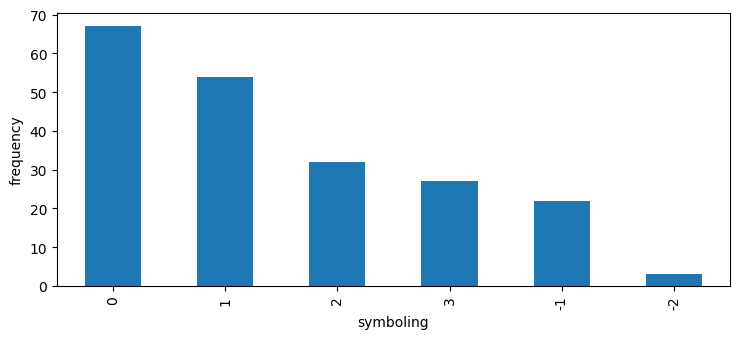

In [53]:
display(df['symboling'].value_counts())

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()

df['symboling'].value_counts().plot(ax=ax, kind='bar', xlabel='symboling', ylabel='frequency')
plt.show()


In [41]:
display(df['CarName'].value_counts())

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64

fueltype
gas       185
diesel     20
Name: count, dtype: int64

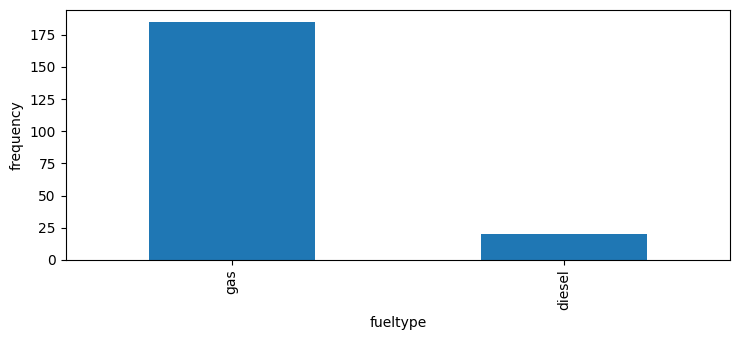

In [54]:
display(df['fueltype'].value_counts())
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()

df['fueltype'].value_counts().plot(ax=ax, kind='bar', xlabel='fueltype', ylabel='frequency')
plt.show()

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

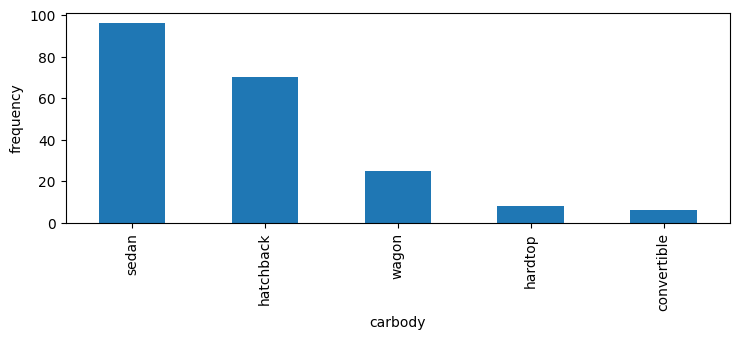

In [55]:
display(df['carbody'].value_counts())
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()

df['carbody'].value_counts().plot(ax=ax, kind='bar', xlabel='carbody', ylabel='frequency')
plt.show()

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

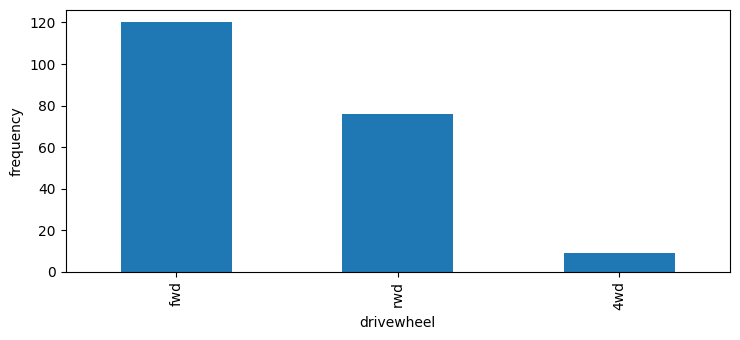

In [56]:
display(df['drivewheel'].value_counts())
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()

df['drivewheel'].value_counts().plot(ax=ax, kind='bar', xlabel='drivewheel', ylabel='frequency')
plt.show()

enginelocation
front    202
rear       3
Name: count, dtype: int64

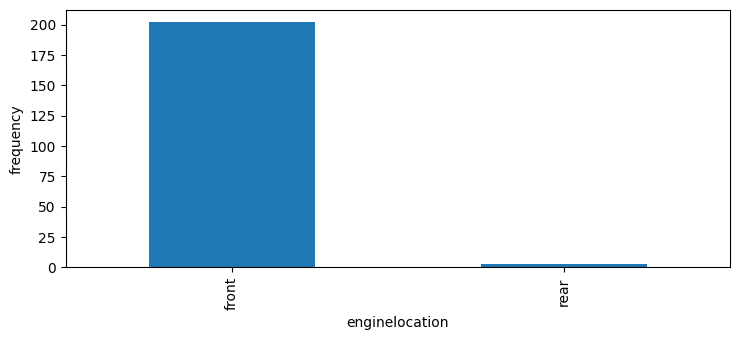

In [57]:
display(df['enginelocation'].value_counts())
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()

df['enginelocation'].value_counts().plot(ax=ax, kind='bar', xlabel='enginelocation', ylabel='frequency')
plt.show()

enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

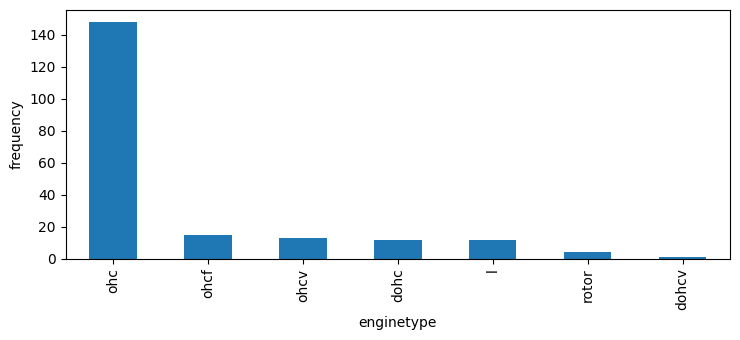

In [58]:
display(df['enginetype'].value_counts())
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()

df['enginetype'].value_counts().plot(ax=ax, kind='bar', xlabel='enginetype', ylabel='frequency')
plt.show()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

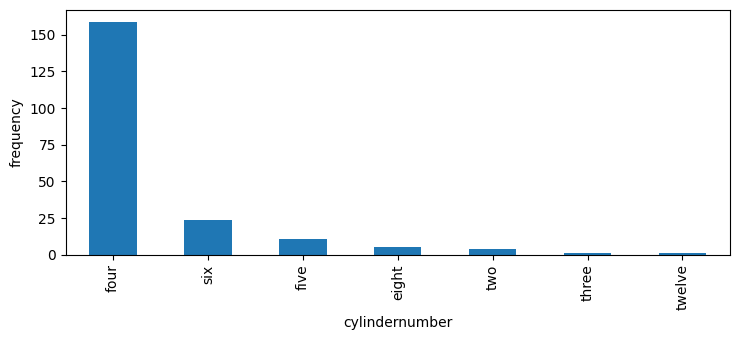

In [59]:
display(df['cylindernumber'].value_counts())
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()

df['cylindernumber'].value_counts().plot(ax=ax, kind='bar', xlabel='cylindernumber', ylabel='frequency')
plt.show()

In [27]:
print(df.dtypes)

symboling            object
CarName              object
fueltype             object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


#### Datos Faltantes

Podemos observar en la siguiente tabla que todos los datos del archivo están completos, no hay ningún dato nulo.

In [8]:
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

#### Histogramas de variables cuantitativas

Para poder analizar datos y encontrar valores atípicos dentro de estos, se utilizarán gráficas de Boxplot para identificar cada uno de estos valores, analizarlos y posteriormente más adelante evaluar si se deben de mantener o eliminar de la base de datos

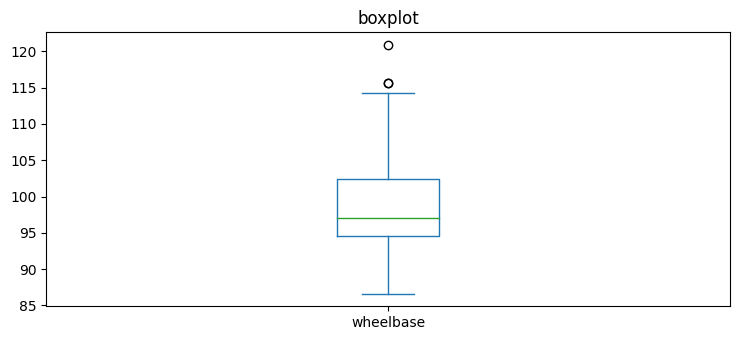

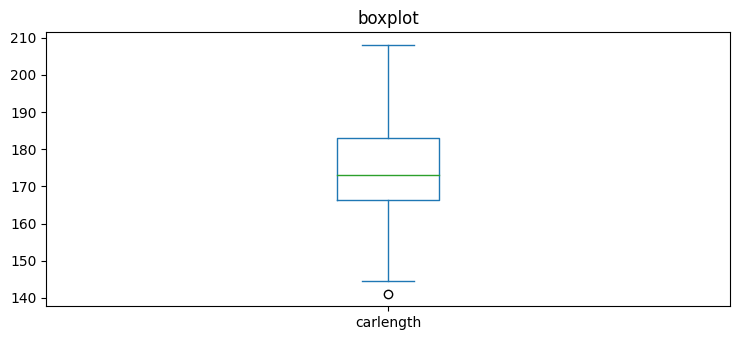

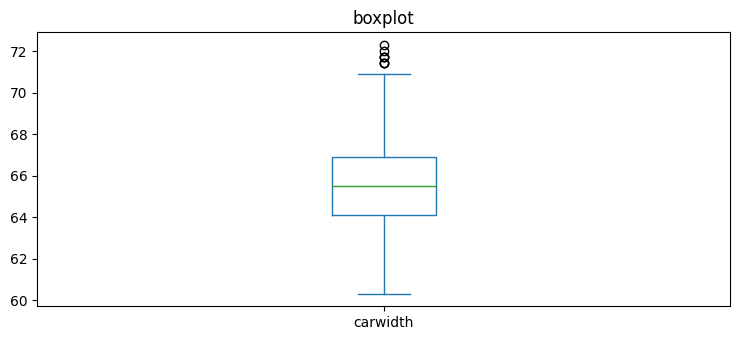

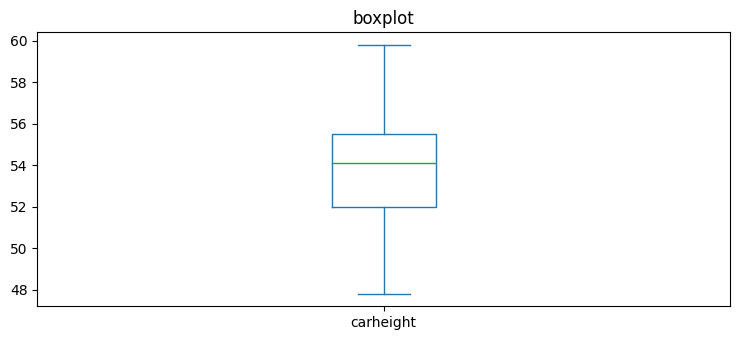

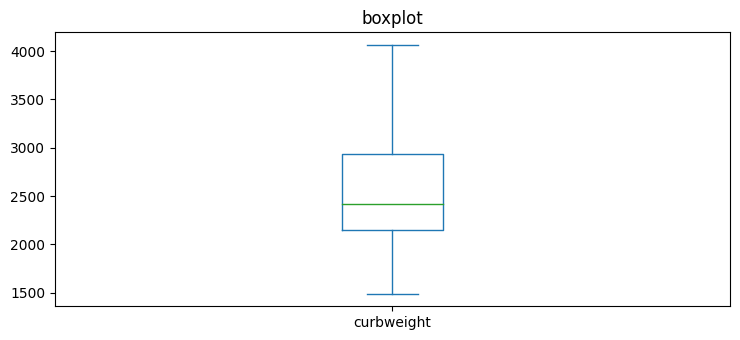

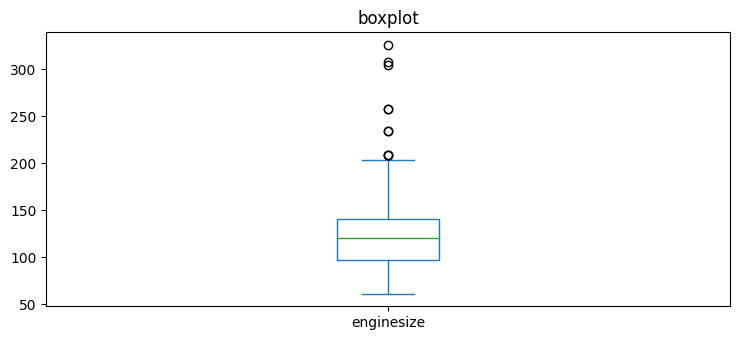

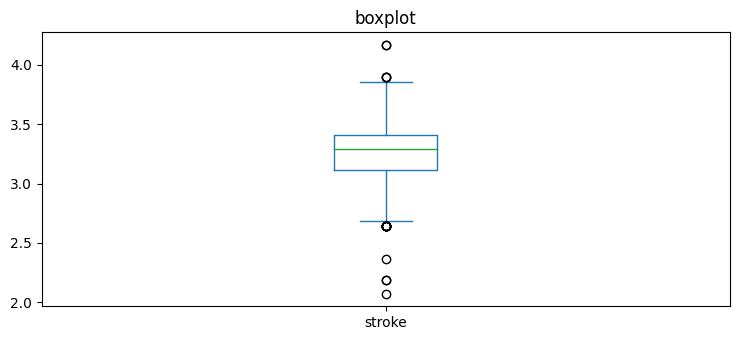

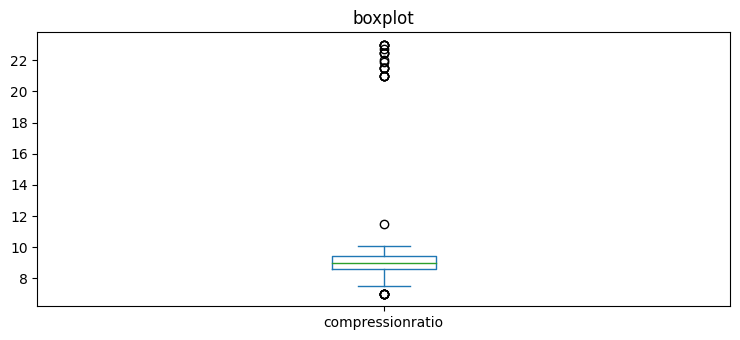

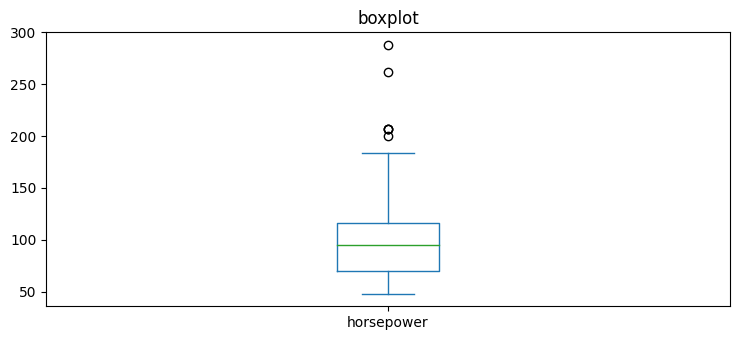

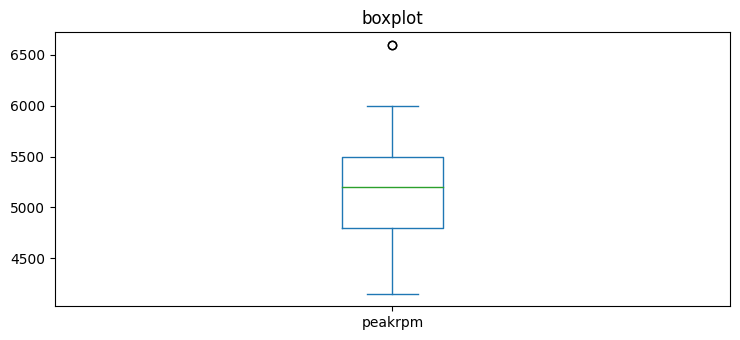

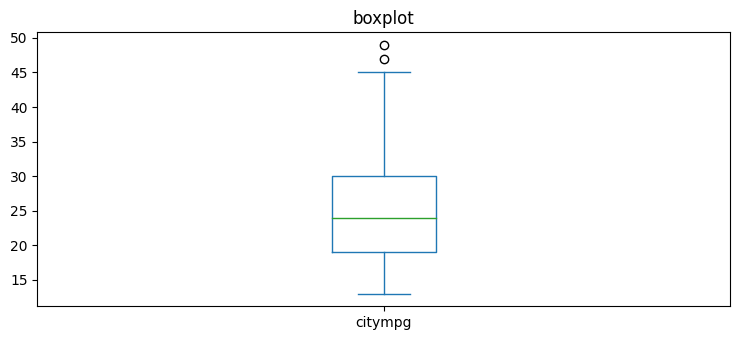

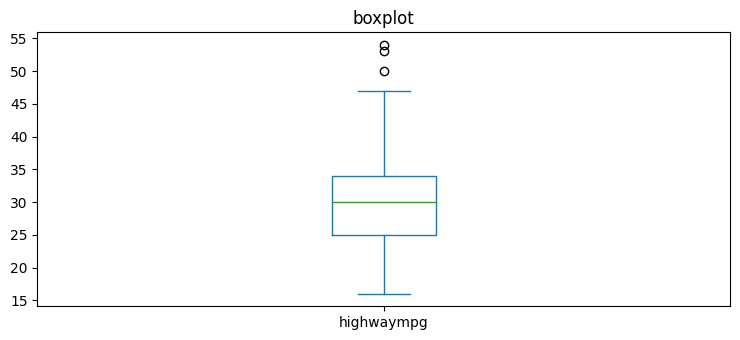

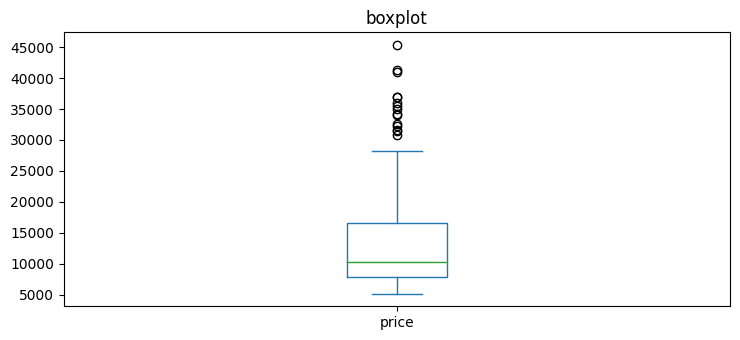

In [108]:
lista = list(df.columns)
categoricos = ['symboling', 'CarName', 'fueltype', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber']
for columna in categoricos:
    lista.remove(columna)

for col in lista:
    ax = df[col].plot(kind='box', title='boxplot')
    plt.show()


0       9.0
1       9.0
2       9.0
3      10.0
4       8.0
       ... 
200     9.5
201     8.7
202     8.8
203    23.0
204     9.5
Name: compressionratio, Length: 205, dtype: float64